In [37]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt


In [2]:
temp_df = data.sf_temps()


In [3]:
temp_df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
# no nulls
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


## Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
# set index to date / sorting index from oldest to newest
temp_df = temp_df.set_index('date').sort_index()

In [6]:
# change frequency to day by resampling
avg_temp = temp_df.resample('D').mean() 


<AxesSubplot:xlabel='date'>

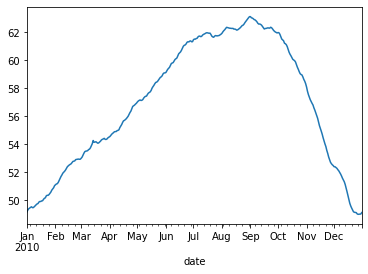

In [7]:
# plot avg temps 
avg_temp.temp.plot()

## Write the code necessary to visualize the minimum temperature over time.

In [8]:
# create dataframe with minimum temperature from each day 
min_temp = temp_df.resample('D').min() 


<AxesSubplot:xlabel='date'>

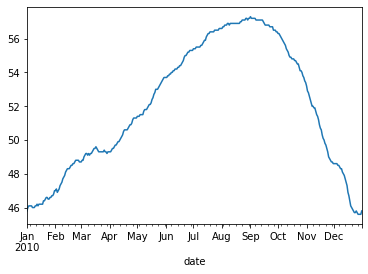

In [9]:
# plot min temps from each day
min_temp.temp.plot()

## Write the code necessary to visualize the maximum temperature over time.


In [10]:
# create dataframe with max temperature from each day 
max_temp = temp_df.resample('D').max() 

<AxesSubplot:xlabel='date'>

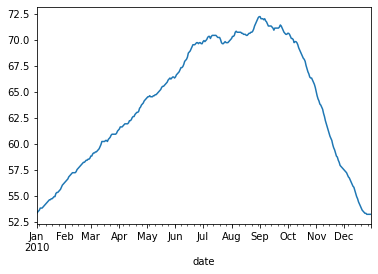

In [11]:
# plot min temps from each day
max_temp.temp.plot()

## Which month is the coldest, on average?


In [12]:
# create dataframe with max temperature from each day 
temp_by_month = temp_df.resample('M').mean()

In [13]:
# coldest month on average by month 
temp_by_month[temp_by_month.temp == temp_by_month.temp.min()]

,temp
date,
2010-01-31,49.98414


## Which month has the highest average temperature?


In [14]:
# Highest average temperature by month
temp_by_month[temp_by_month.temp == temp_by_month.temp.max()]

,temp
date,
2010-09-30,62.487083


## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [68]:
# creating dataframe to house min and max for each day 
hi_lo_temp_df = temp_df.resample('D').temp.agg(['min','max'])

hi_lo_temp_df

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [26]:
hi_lo_temp_df['temp']['max']

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
              ... 
2010-12-27    53.2
2010-12-28    53.2
2010-12-29    53.2
2010-12-30    53.2
2010-12-31    53.2
Freq: D, Name: max, Length: 365, dtype: float64

In [27]:
# found difference between high and max and min temperature 
hi_lo_temp_df['variability']=hi_lo_temp_df['temp']['max'] - hi_lo_temp_df['temp']['min']

In [31]:
# day with highest variance in temperature 
hi_lo_temp_df[hi_lo_temp_df.variability == hi_lo_temp_df.variability.max()]

temp       variability
             min   max            
date                              
2010-08-31  57.2  72.2        15.0

## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [32]:
temp_df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [33]:
daily_temp_df = temp_df.resample('D')

In [34]:
avg_temp
min_temp

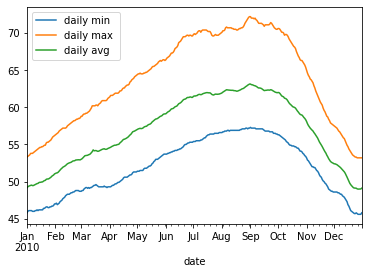

In [39]:
# plot of min, average and max temp over time 
min_temp.temp.plot(label='daily min ')
max_temp.temp.plot(label='daily max ')
avg_temp.temp.plot(label='daily avg')
plt.legend()
plt.show()

# Seattle Data Set Questions 

## Which year and month combination has the highest amount of precipitation?


In [42]:
# acquire data 
seattle_weather_df = data.seattle_weather()


In [44]:
# no nulls and date is correctly formated 
seattle_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [73]:
# classroom solution 

seattle_weather_df.set_index('date', inplace=True)
seattle_weather_df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [74]:
seattle_weather_df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [77]:
# more readable version of answer 
seattle_weather_df.resample('M').precipitation.sum().idxmax().strftime('%B,%Y')

'December,2015'

## Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

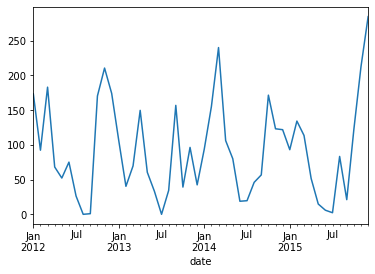

In [83]:
# visualization of rain 
seattle_weather_df.resample('M').precipitation.sum().plot()

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

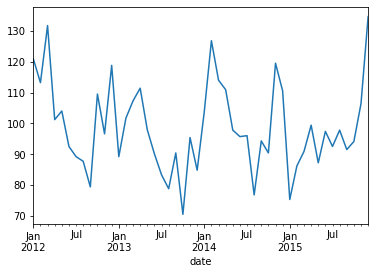

In [85]:
seattle_weather_df.resample('M').wind.sum().plot()

## Which year-month combination is the windiest?


In [87]:
seattle_weather_df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [88]:
seattle_weather_df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [89]:
seattle_weather_df.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In [90]:
# filter out days without sun as weather 
# resample by year 
# idx max
seattle_weather_df.resample('Y').weather.value_counts().idxmax()

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 'sun')

## In which month does it rain the most?


In [93]:
rain_by_month = pd.DataFrame(seattle_weather_df.resample('M').precipitation.sum())

In [94]:
rain_by_month['month'] = rain_by_month.index.strftime('%B')

In [95]:
rain_by_month.groupby('month').precipitation.mean()

month
April         93.850
August        40.925
December     155.675
February     105.500
January      116.500
July          12.050
June          33.225
March        151.550
May           51.875
November     160.625
October      125.850
September     58.875
Name: precipitation, dtype: float64

In [96]:
rain_by_month.groupby('month').precipitation.sum().idxmax()

'November'

## Which month has the most number of days with a non-zero amount of precipitation?


In [97]:
# if statement if a 0 keep it a 0 if it is false make it a 1
seattle_weather_df['did_rain'] = np.where(seattle_weather_df['precipitation'] == 0,0,1)

In [98]:
seattle_weather_df

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,1
2015-12-28,1.5,5.0,1.7,1.3,fog,1
2015-12-29,0.0,7.2,0.6,2.6,fog,0


In [99]:
seattle_weather_df.resample('M').did_rain.sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: did_rain, dtype: int64

In [100]:
seattle_weather_df.resample('M').did_rain.sum().idxmax().strftime('%B, %Y')

'December, 2012'

In [101]:
did_rain_df = pd.DataFrame(seattle_weather_df.resample('M').did_rain.sum())

In [102]:
did_rain_df['month']= did_rain_df.index.strftime('%B')

In [104]:
did_rain_df.groupby('month').did_rain.sum().idxmax()

'December'